# Final Project: Analysis of Airline Reviews

## I. Motivation

The goal of the project is to predict the overall rating of airline reviews using regression and subsequently classify customer recommendations based on the predicted overall values and customer reviews. It is a supervised learning problem involving regression and classification tasks.

The goal of the project is to develop several prediction models and determine which one has the highest accuracy for evaluating the overall rating of airline reviews based on the other rankings. As a final goal, the predicted overall ratings and customer reviews will be used to categorize the recommendations using multiple classifiers. All of these should help airlines to better understand customer sentiments and improve customer experience.

## II. Dataset

The dataset used for this project is sourced from Kaggle: <a href="https://www.kaggle.com/datasets/efehandanisman/skytrax-airline-reviews?resource=download" target="_blank">Skytrax Airline Reviews</a>. The dataset contains tabulated data with 131895 rows and 17 columns, presented in .xlsx format. 

The dataset contains reviews and ratings from 2006 to 2019 for various airlines. Responses were given by the customers in both, multiple choice and free text forms.

Feature descriptions are as follows:

| Feature | Short Description | Data Type | Example Data |
| :- | -: | -: | :-: |
| airline | Name of the airline | object (categorical) | Ukraine International |
| overall | Overall point given by the customer (rated between 1.0–10.0) | float64 (numeric) | 9.0 |
| author | Author of the review | object (categorical) | Volodya Bilotkach |
| review_date | Date of the review | object (categorical) | 29th April 2006 |
| customer_review | Review in free text format | object (categorical) | Several flights - KBP to AMS... |
| aircraft | Type of the aircraft | object (categorical) | A330 |
| traveller_type | Type of traveller | object (categorical) | Family Leisure |
| cabin | Cabin at the flight | object (categorical) | Economy Class |
| route | Flight route | object (categorical) | Istanbul to Bucharest |
| date_flown | Flight date | object (categorical) | 2019-05-01 00:00:00 |
| seat_comfort | Point for seat comfort (rated between 1.0–5.0) | float64 (numeric) | 1.0 |
| cabin_service | Point for cabin service (rated between 1.0–5.0) | float64 (numeric) | 1.0 |
| food_bev | Point for food and beverages (rated between 1.0–5.0) | float64 (numeric) | 1.0 |
| entertainment | Point for entertainment (rated between 1.0–5.0) | float64 (numeric) | 1.0 |
| ground_service | Point for ground service (rated between 1.0–5.0) | float64 (numeric) | 1.0 |
| value_for_money | Point for value for money (rated between 1.0–5.0) | float64 (numeric) | 1.0 |
| recommended | Final recommendation | object (categorical) | yes |

##### Required before you start:
***
* pip install openpyxl
* pip install scipy
* pip install seaborn
* pip install statsmodels
* pip install tabulate
***

# III. Data Cleaning and Imputation
Before proceeding with data cleaning, we need to import the necessary packages and familiarize ourselves with the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

import copy
import itertools
import math

from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate

# Constants
TARGET_COLUMN = 'overall'
SKIPPED_COLUMNS = ['recommended', 'customer_review', ]

In [4]:
df = pd.read_excel("capstone_airline_reviews3.xlsx")
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

## 3.1 Initial Data Cleaning

The above information reports that the dataset has over 50% of null values. Therefore, as a first step, we will drop all rows containing only null values and review the dataset again:

In [6]:
df.dropna(axis=0, how='all', inplace=True)
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


We see that the number of rows has indeed decreased from 131.895 to 65.947!
Next, we want to investigate the null values and the corresponding null percentages for each of the features. For this purpose, we define and call the following function, which returns the required data using tabulate:

In [7]:
def generate_null_summary_table(data):
    a = [np.nan, None, [], {}, 'NaN', 'Null', 'NULL', 'None', 'NA', '?', '-', '.', 
         '', ' ', '   ']
    table_data = []
    features_with_nulls = []

    for c in data.columns:
        null_count = data[c].isnull().sum()
        null_percentage = round((null_count / len(data.index)) * 100, 1)

        table_data.append([c, null_count, null_percentage])
        if null_count != 0:
            features_with_nulls.append((c, null_percentage))

    return features_with_nulls, tabulate(table_data, headers=["Column", "Null Count", 
                                                              "Null Percentage"], 
                                         tablefmt="fancy_grid")

features_with_nulls, null_summary_table = generate_null_summary_table(df)
print(null_summary_table)

╒═════════════════╤══════════════╤═══════════════════╕
│ Column          │   Null Count │   Null Percentage │
╞═════════════════╪══════════════╪═══════════════════╡
│ airline         │            0 │               0   │
├─────────────────┼──────────────┼───────────────────┤
│ overall         │         1930 │               2.9 │
├─────────────────┼──────────────┼───────────────────┤
│ author          │            0 │               0   │
├─────────────────┼──────────────┼───────────────────┤
│ review_date     │            0 │               0   │
├─────────────────┼──────────────┼───────────────────┤
│ customer_review │            0 │               0   │
├─────────────────┼──────────────┼───────────────────┤
│ aircraft        │        46229 │              70.1 │
├─────────────────┼──────────────┼───────────────────┤
│ traveller_type  │        26192 │              39.7 │
├─────────────────┼──────────────┼───────────────────┤
│ cabin           │         2644 │               4   │
├─────────

Now we need to decide which features to discard and which to impute. The decision threshold will be set to a rather high value = 21 to allow for the "food_bev" attribute as well. The following function returns a table of results, which are necessary for further analysis:

In [8]:
def generate_feature_summary_table(data, threshold, features_with_nulls):
    features_without_nulls = [c for c in data.columns if c not in 
                              [f[0] for f in features_with_nulls]]
    features_to_impute = []
    features_to_throw = []

    for (f, v) in features_with_nulls:
        if v > threshold:
            features_to_throw.append(f)
        else:
            features_to_impute.append(f)

    table_data = [
        ["Features without NaNs", "\n".join(features_without_nulls)],
        ["Features to Impute", "\n".join(features_to_impute)],
        ["Features to Throw", "\n".join(features_to_throw)]
    ]

    return features_to_throw, tabulate(table_data, headers=["Parameter", "Features"], 
                                       tablefmt="fancy_grid")

features_to_throw, feature_summary_table = generate_feature_summary_table(df, 21, 
                                                                          features_with_nulls)
print(feature_summary_table)

╒═══════════════════════╤═════════════════╕
│ Parameter             │ Features        │
╞═══════════════════════╪═════════════════╡
│ Features without NaNs │ airline         │
│                       │ author          │
│                       │ review_date     │
│                       │ customer_review │
├───────────────────────┼─────────────────┤
│ Features to Impute    │ overall         │
│                       │ cabin           │
│                       │ seat_comfort    │
│                       │ cabin_service   │
│                       │ food_bev        │
│                       │ value_for_money │
│                       │ recommended     │
├───────────────────────┼─────────────────┤
│ Features to Throw     │ aircraft        │
│                       │ traveller_type  │
│                       │ route           │
│                       │ date_flown      │
│                       │ entertainment   │
│                       │ ground_service  │
╘═══════════════════════╧═══════

Let's discard the features listed in the last row of the above table, as well as features that will be irrelevant to our analysis, and look at the dataset:

In [9]:
df.drop(features_to_throw, axis=1, inplace=True)
df.drop('airline', axis=1, inplace=True)
df.drop('author', axis=1, inplace=True)
df.drop('review_date', axis=1, inplace=True)
df.drop('cabin', axis=1, inplace=True)
df

,overall,customer_review,seat_comfort,cabin_service,food_bev,value_for_money,recommended
1,7.0,âœ… Trip Verified | London to Izmir via Istanb...,4.0,5.0,4.0,4.0,yes
3,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,4.0,1.0,1.0,1.0,no
5,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,1.0,4.0,1.0,2.0,no
7,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,4.0,5.0,5.0,5.0,yes
9,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...
131886,NaN,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,no
131888,NaN,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,no
131890,NaN,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,no
131892,NaN,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,no


The next two function calls give us good insights into the unique values:

In [10]:
def generate_unique_values_table(data):
    table_data = []

    for c in data.columns:
        unique_count = len(data[c].unique())
        data_type = data[c].dtype
        table_data.append([c, unique_count, data_type])

    table_headers = ["Feature", "Unique Values", "Data Type"]
    return tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")
    
print(generate_unique_values_table(df))

╒═════════════════╤═════════════════╤═════════════╕
│ Feature         │   Unique Values │ Data Type   │
╞═════════════════╪═════════════════╪═════════════╡
│ overall         │              11 │ float64     │
├─────────────────┼─────────────────┼─────────────┤
│ customer_review │           61172 │ object      │
├─────────────────┼─────────────────┼─────────────┤
│ seat_comfort    │               6 │ float64     │
├─────────────────┼─────────────────┼─────────────┤
│ cabin_service   │               6 │ float64     │
├─────────────────┼─────────────────┼─────────────┤
│ food_bev        │               6 │ float64     │
├─────────────────┼─────────────────┼─────────────┤
│ value_for_money │               6 │ float64     │
├─────────────────┼─────────────────┼─────────────┤
│ recommended     │               3 │ object      │
╘═════════════════╧═════════════════╧═════════════╛


In [11]:
def generate_unique_values_table(data, threshold):
    output = []
    for c in data.columns:
        if len(data[c].unique()) < threshold:
            unique_values = data[c].unique()
            output.append([c, ', '.join(map(str, unique_values))])
        else:
            print("Too many unique values for", c)

    headers = ["Column", "Unique Values"]
    return tabulate(output, headers=headers, tablefmt="fancy_grid")

print(generate_unique_values_table(df, 20))

Too many unique values for customer_review
╒═════════════════╤════════════════════════════════════════════════════════╕
│ Column          │ Unique Values                                          │
╞═════════════════╪════════════════════════════════════════════════════════╡
│ overall         │ 7.0, 2.0, 3.0, 10.0, 1.0, 6.0, 8.0, 5.0, 4.0, 9.0, nan │
├─────────────────┼────────────────────────────────────────────────────────┤
│ seat_comfort    │ 4.0, 1.0, 3.0, 2.0, 5.0, nan                           │
├─────────────────┼────────────────────────────────────────────────────────┤
│ cabin_service   │ 5.0, 1.0, 4.0, 3.0, 2.0, nan                           │
├─────────────────┼────────────────────────────────────────────────────────┤
│ food_bev        │ 4.0, 1.0, 5.0, nan, 2.0, 3.0                           │
├─────────────────┼────────────────────────────────────────────────────────┤
│ value_for_money │ 4.0, 1.0, 2.0, 5.0, 3.0, nan                           │
├─────────────────┼──────────────

Great news - we don't have any other issues in the data other than null values, so now we need to figure out how to impute these values.

We need to stipulate right away that we'll be using different imputation techniques, which we'll start analyzing and comparing in the next chapter.
Before that, however, we want to remove all the rows containing only NaN values for all numeric features (except „overall“), since these will be used for our future predictions and would thus produce outliers.

In [12]:
df.drop(df.loc[df['seat_comfort'].isna() & df['cabin_service'].isna() & 
                df['value_for_money'].isna() & df['food_bev'].isna()].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,overall,customer_review,seat_comfort,cabin_service,food_bev,value_for_money,recommended
0,7.0,âœ… Trip Verified | London to Izmir via Istanb...,4.0,5.0,4.0,4.0,yes
1,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,4.0,1.0,1.0,1.0,no
2,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,1.0,4.0,1.0,2.0,no
3,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,4.0,5.0,5.0,5.0,yes
4,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...
64123,4.0,Kiev - Frankfurt - Kiev weekly normally with L...,NaN,NaN,NaN,4.0,yes
64124,8.0,Berlin-Kiev-Berlin B737-400. The return flight...,NaN,NaN,NaN,4.0,yes
64125,5.0,Some 5 flights within couple months. Most of t...,NaN,NaN,NaN,4.0,no
64126,8.0,Vienna-Kiev return in Coach. Check in fine at ...,NaN,NaN,NaN,4.0,yes


## 3.2 Imputation Analysis

Our goal is to perform imputation without disruption the original data distribution for each of the features. Thus, we need to try several techniques for each feature. In order to decide which technique to use, we will rely on the Kurtosis value, which measures the heaviness of the tails of a distribution. A negative kurtosis indicates light tails (platykurtic), while a positive kurtosis indicates heavy tails (leptokurtic). A normal distribution has a kurtosis value of 0.

The above function compares two imputation techniques: filling with a specific value (in our case, zeros) and the mean/median:

In [13]:
def compare_imputation_techniques(data, threshold=0.5):
    results = []
    
    for feature in data.columns:
        if feature != TARGET_COLUMN and feature not in SKIPPED_COLUMNS:

            feature_data_with_zeros = data[feature].copy()
            feature_data_with_m = data[feature].copy()

            feature_data_with_zeros.fillna(0, inplace=True)

            kurtosis_original = data[feature].kurtosis()
            kurtosis_with_zeros = feature_data_with_zeros.kurtosis()

            if abs(kurtosis_original) <= threshold:
                dist = "Normal"
                feature_data_with_m.fillna(data[feature].mean(), 
                                                        inplace=True)
            else:
                dist = "Skewed"
                feature_data_with_m.fillna(data[feature].median(), 
                                                        inplace=True)

            kurtosis_with_m = feature_data_with_m.kurtosis()

            results.append((feature, dist, kurtosis_original, kurtosis_with_zeros, 
                            kurtosis_with_m))
        
    return tabulate(results, headers=['Feature', 'Dist_orig', 
                                       'Kurtosis_orig', 'Kurtosis_zero', 
                                       'Kurtosis_aver'], tablefmt="fancy_grid")
    
print(compare_imputation_techniques(df))

╒═════════════════╤═════════════╤═════════════════╤═════════════════╤═════════════════╕
│ Feature         │ Dist_orig   │   Kurtosis_orig │   Kurtosis_zero │   Kurtosis_aver │
╞═════════════════╪═════════════╪═════════════════╪═════════════════╪═════════════════╡
│ seat_comfort    │ Skewed      │        -1.34749 │        -1.24262 │        -1.25329 │
├─────────────────┼─────────────┼─────────────────┼─────────────────┼─────────────────┤
│ cabin_service   │ Skewed      │        -1.47933 │        -1.38876 │        -1.40224 │
├─────────────────┼─────────────┼─────────────────┼─────────────────┼─────────────────┤
│ food_bev        │ Skewed      │        -1.41184 │        -1.37259 │        -1.06583 │
├─────────────────┼─────────────┼─────────────────┼─────────────────┼─────────────────┤
│ value_for_money │ Skewed      │        -1.57117 │        -1.56345 │        -1.56775 │
╘═════════════════╧═════════════╧═════════════════╧═════════════════╧═════════════════╛


From the table, we can see that the original distribution for all the eatues is skewed. We can also note that both techniques will not change the original distribution, so we can choose either imputation technique. 

Let's fill the null values for all features except the skipped ones (since they have a categorical data type) with zeros, to better show that this value is not original (we remember that numeric values for the features take values from 1 to 5):

In [14]:
for f in df.columns:
    if f != TARGET_COLUMN and f not in SKIPPED_COLUMNS:
        df[f].fillna(0, inplace=True)
df

,overall,customer_review,seat_comfort,cabin_service,food_bev,value_for_money,recommended
0,7.0,âœ… Trip Verified | London to Izmir via Istanb...,4.0,5.0,4.0,4.0,yes
1,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,4.0,1.0,1.0,1.0,no
2,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,1.0,4.0,1.0,2.0,no
3,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,4.0,5.0,5.0,5.0,yes
4,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...
64123,4.0,Kiev - Frankfurt - Kiev weekly normally with L...,0.0,0.0,0.0,4.0,yes
64124,8.0,Berlin-Kiev-Berlin B737-400. The return flight...,0.0,0.0,0.0,4.0,yes
64125,5.0,Some 5 flights within couple months. Most of t...,0.0,0.0,0.0,4.0,no
64126,8.0,Vienna-Kiev return in Coach. Check in fine at ...,0.0,0.0,0.0,4.0,yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64128 entries, 0 to 64127
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          62363 non-null  float64
 1   customer_review  64128 non-null  object 
 2   seat_comfort     64128 non-null  float64
 3   cabin_service    64128 non-null  float64
 4   food_bev         64128 non-null  float64
 5   value_for_money  64128 non-null  float64
 6   recommended      64128 non-null  object 
dtypes: float64(5), object(2)
memory usage: 3.4+ MB


We see that all columns except 'overall' have no null values, which means we can start imputing the target vales. But what model should we use?

## 3.3 Regression Analysis and Imputation

Before we start selecting the final model we will generate adjusted R-squared for each of the four predictors. To do this, we will use the following function:

In [16]:
def generate_r_squared_predictors_table(data):
    preds = {}

    for v in data.columns:
        if v != TARGET_COLUMN and v not in SKIPPED_COLUMNS:
            model = smf.ols(formula=f'{TARGET_COLUMN} ~ {v}', data=data).fit()
            preds[model.rsquared_adj] = v

    sorted_preds = dict(sorted(preds.items(), key=lambda item: item[0], reverse=True))

    table_data = [(v, rsquared_adj) for rsquared_adj, v in sorted_preds.items()]
    best_pred = list(sorted_preds.items())[0][1]
    
    table_headers = ["Predictor", "Adj. R-squared"]
    return best_pred, tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")

best_predictor, r_squared_predictors_table = generate_r_squared_predictors_table(df)
print(r_squared_predictors_table)

╒═════════════════╤══════════════════╕
│ Predictor       │   Adj. R-squared │
╞═════════════════╪══════════════════╡
│ value_for_money │         0.796009 │
├─────────────────┼──────────────────┤
│ cabin_service   │         0.52429  │
├─────────────────┼──────────────────┤
│ seat_comfort    │         0.499735 │
├─────────────────┼──────────────────┤
│ food_bev        │         0.438254 │
╘═════════════════╧══════════════════╛


From the table, we can see that the best predictor is the value for money feature. Let´s generate some Polynomial Regression models using this parameter:

In [17]:
def generate_r_squared_poly_table(data, best_pred, n=10):
    pows = {}

    for i in range(2, n+1):
        f = f"{TARGET_COLUMN} ~ {best_pred} + " + " + ".join(
            f"np.power({best_pred},{j})" for j in range(2, i+1))
        model = smf.ols(formula=f, data=data).fit()
        pows[model.rsquared_adj] = i

    sorted_pows = dict(sorted(pows.items(), key=lambda item: item[0], reverse=True))

    table_data = [(i, rsquared_adj) for rsquared_adj, i in sorted_pows.items()]

    table_headers = ["Degree", "Adj. R-squared"]
    return tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")

print(generate_r_squared_poly_table(df, best_predictor))

╒══════════╤══════════════════╕
│   Degree │   Adj. R-squared │
╞══════════╪══════════════════╡
│        5 │         0.806733 │
├──────────┼──────────────────┤
│        8 │         0.806733 │
├──────────┼──────────────────┤
│        6 │         0.806686 │
├──────────┼──────────────────┤
│        9 │         0.80667  │
├──────────┼──────────────────┤
│       10 │         0.80665  │
├──────────┼──────────────────┤
│        7 │         0.80661  │
├──────────┼──────────────────┤
│        4 │         0.806243 │
├──────────┼──────────────────┤
│        3 │         0.806119 │
├──────────┼──────────────────┤
│        2 │         0.796408 │
╘══════════╧══════════════════╛


From the table, we see that the best result is achieved for the fifth and eighth degrees, but the adjusted R-squared is not high enough to increase the degree at all, so the linear function remains as our only impution model candidate.

Now we want to take a closer look at the other predictors and their combinations trying to get a better model. For this purpose, we will use the Forward Stepwise Refinement algorithm:

In [18]:
def forward_stepwise_refinement(data):
    features_to_remove = set(SKIPPED_COLUMNS + [TARGET_COLUMN])
    features = [f for f in list(data.columns.values) if f not in features_to_remove]

    results = {}

    for k in range(1, len(features)+1):
        best = ['', 0]
        selected_features = []

        for _ in range(k):
            if not features:
                break

            candidate_rsquareds = []

            for f in features:
                formula = f'{TARGET_COLUMN} ~ {" + ".join(selected_features)} + {f}'
                model = smf.ols(formula=formula, data=data).fit()
                candidate_rsquareds.append((f, model.rsquared_adj))

            best_feature, rsquared_improvement = max(candidate_rsquareds, 
                                                     key=lambda x: x[1])
            selected_features.append(best_feature)

            if rsquared_improvement > best[1]:
                best = [best_feature, rsquared_improvement]

        results[k] = (selected_features, best[0], best[1])
    
    fformula = f'{TARGET_COLUMN} ~ {" + ".join(selected_features)}'

    return results, fformula

r, f = forward_stepwise_refinement(df)

for k, (selected_features, best_feature, best_rsquared) in r.items():
    selected_features_str = "\n".join(map(str, selected_features))
    data = [
        ["Best Additional Feature", best_feature],
        ["Selected Features", selected_features_str],
        ["Best Adjusted R-squared", f"{best_rsquared:.4f}"]
    ]
    print(f"Number of features = {k}")
    print(tabulate(data, headers=["Parameter", "Value"], tablefmt="fancy_grid", 
                   colalign=("left", "right")))
print("Formula:", f)

Number of features = 1
╒═════════════════════════╤═════════════════╕
│ Parameter               │           Value │
╞═════════════════════════╪═════════════════╡
│ Best Additional Feature │ value_for_money │
├─────────────────────────┼─────────────────┤
│ Selected Features       │ value_for_money │
├─────────────────────────┼─────────────────┤
│ Best Adjusted R-squared │          0.7960 │
╘═════════════════════════╧═════════════════╛
Number of features = 2
╒═════════════════════════╤═════════════════╕
│ Parameter               │           Value │
╞═════════════════════════╪═════════════════╡
│ Best Additional Feature │   cabin_service │
├─────────────────────────┼─────────────────┤
│ Selected Features       │ value_for_money │
│                         │   cabin_service │
├─────────────────────────┼─────────────────┤
│ Best Adjusted R-squared │          0.8186 │
╘═════════════════════════╧═════════════════╛
Number of features = 3
╒═════════════════════════╤═════════════════╕
│ Parameter

In addition to the results, this function presents us with the final formula. Although the difference in the adjusted R-squared for the three and four parameter models is not very large, we will use the four parameter model next. Before imputing, let's look at the model summary and make sure that all parameters are statically signiﬁcant:

In [19]:
model = smf.ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 7.267e+04
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        01:11:49   Log-Likelihood:            -1.1224e+05
No. Observations:               62363   AIC:                         2.245e+05
Df Residuals:                   62358   BIC:                         2.245e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1124      0.013    -

Next, we replace the null values of the target column with the predictions of our model and look at the result:

In [20]:
# Separate data with missing 'overall' values and data with known 'overall' values
data_with_values = df.dropna(subset=[TARGET_COLUMN])
data_to_predict = df[df[TARGET_COLUMN].isnull()]

model = smf.ols(formula=f, data=data_with_values).fit()
predicted_values = model.predict(data_to_predict)

# Get index list (only for printing the updated rows)
index_list = predicted_values.index.tolist()

df.loc[df[TARGET_COLUMN].isnull(), TARGET_COLUMN] = predicted_values.round()

updated_rows = df.loc[index_list]
updated_rows

,overall,customer_review,seat_comfort,cabin_service,food_bev,value_for_money,recommended
1336,5.0,London Heathrow to Odessa (Ukraine) return. Th...,4.0,1.0,1.0,3.0,no
1340,2.0,I took a business class flight from London to ...,1.0,3.0,3.0,1.0,no
1341,5.0,London Heathrow to Odessa (Ukraine) return. Th...,4.0,1.0,1.0,3.0,no
1345,3.0,TK0710 and TK0711. The service from Istanbul t...,2.0,1.0,4.0,2.0,no
1347,2.0,Chicago - Kathmandu- Chicago. Poor to fair inf...,3.0,2.0,3.0,1.0,no
...,...,...,...,...,...,...,...
64060,1.0,19/3/2015 PS416 KBP-MUC. Seat comfort and leg ...,1.0,1.0,1.0,1.0,no
64084,2.0,May 26th PS112 London Gatwick to Kiev. PS611 K...,1.0,3.0,1.0,1.0,no
64088,4.0,I was flying Geneva-Kiev-Moscow with this comp...,2.0,1.0,1.0,3.0,no
64097,2.0,Quality worsened significantly since last time...,3.0,2.0,1.0,1.0,no


In [21]:
# Check if there are no NaN values in the DataFrame
assert not df.drop(columns=SKIPPED_COLUMNS).isna().any().any(), "DataFrame still contains NaN values"

In [22]:
print(generate_unique_values_table(df, 20))

Too many unique values for customer_review
╒═════════════════╤═══════════════════════════════════════════════════════════════╕
│ Column          │ Unique Values                                                 │
╞═════════════════╪═══════════════════════════════════════════════════════════════╡
│ overall         │ 7.0, 2.0, 3.0, 10.0, 1.0, 6.0, 8.0, 5.0, 4.0, 9.0, -1.0, -0.0 │
├─────────────────┼───────────────────────────────────────────────────────────────┤
│ seat_comfort    │ 4.0, 1.0, 3.0, 2.0, 5.0, 0.0                                  │
├─────────────────┼───────────────────────────────────────────────────────────────┤
│ cabin_service   │ 5.0, 1.0, 4.0, 3.0, 2.0, 0.0                                  │
├─────────────────┼───────────────────────────────────────────────────────────────┤
│ food_bev        │ 4.0, 1.0, 5.0, 0.0, 2.0, 3.0                                  │
├─────────────────┼───────────────────────────────────────────────────────────────┤
│ value_for_money │ 4.0, 1.0, 2.0

Now our dataset has no null values, however sometimes the model generates negative values for the target. If this happens, we remove these rows from the dataset:

In [23]:
# Check if any value in the column is -0
if -0 in df[TARGET_COLUMN].values:
    df[TARGET_COLUMN] = df[TARGET_COLUMN].replace(-0, 0)

# Filter out rows where the 'overall' column contains negative values
df[~(df[TARGET_COLUMN] < 0)]
df.reset_index(drop=True, inplace=True)

In [24]:
df.corr(numeric_only=True)[TARGET_COLUMN].sort_values(axis=0)

food_bev           0.664922
seat_comfort       0.708402
cabin_service      0.729190
value_for_money    0.895152
overall            1.000000
Name: overall, dtype: float64

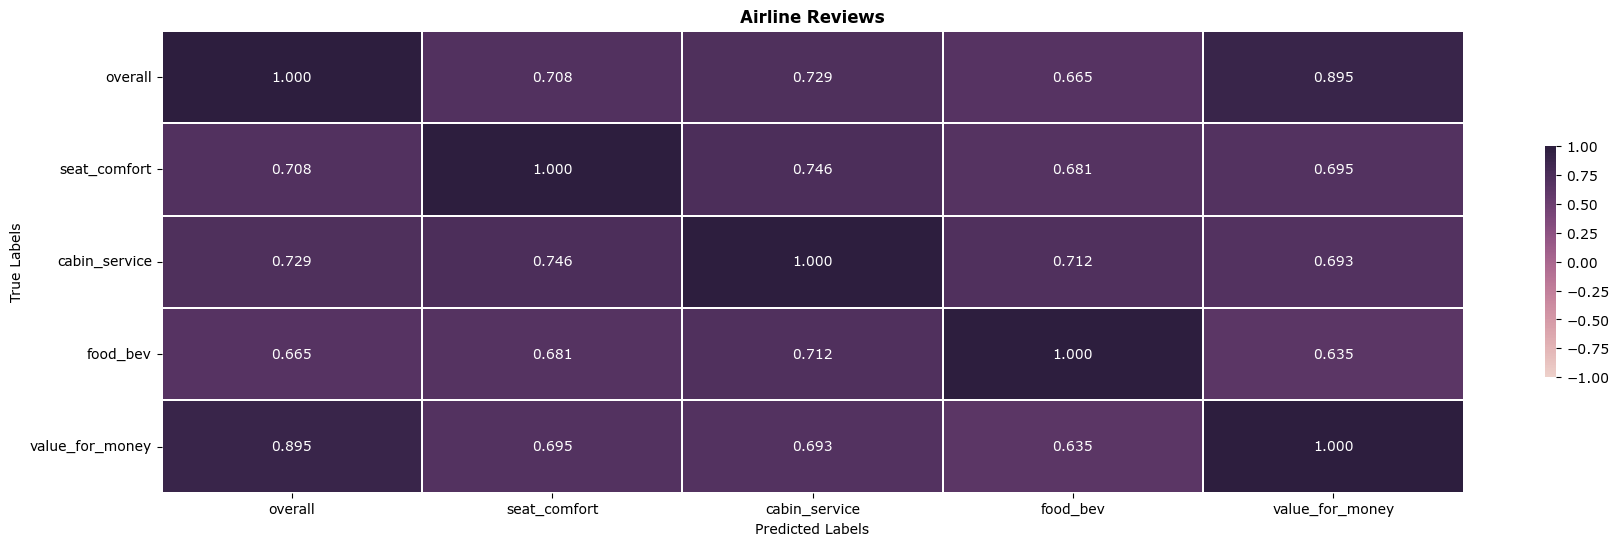

In [46]:
fig, ax = plt.subplots(figsize=(21, 6))
ax.set_title('Airline Reviews', weight='bold')
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=',.3f', linewidths=0.1, 
            cmap=sns.cubehelix_palette(as_cmap=True), 
            vmin=-1, vmax=1, cbar_kws={"shrink": 0.5})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Lastly, we generate a confusion matrix to look at the correlation between the features and the target. As we expected, the highest correlation is observed between the target and the value-for-money feature. It is also interesting to note that, according to the matrix, the food-bev feature describes the target the worst but it should be taken into account that 20% of the data for this feature were null data, which does not mean that this result is 100% correct.

# IV. Classification Models

In this chapter, we want to build some classification models using the customer review and overall (some value of which we predicted in the previous chapter) features to classify the values for the recommended feature, which is out new target.

In [26]:
df_cl = df[['recommended', 'customer_review', 'overall']]
df_cl

,recommended,customer_review,overall
0,yes,âœ… Trip Verified | London to Izmir via Istanb...,7.0
1,no,âœ… Trip Verified | Istanbul to Bucharest. We ...,2.0
2,no,âœ… Trip Verified | Rome to Prishtina via Ista...,3.0
3,yes,âœ… Trip Verified | Flew on Turkish Airlines I...,10.0
4,no,âœ… Trip Verified | Mumbai to Dublin via Istan...,1.0
...,...,...,...
64123,yes,Kiev - Frankfurt - Kiev weekly normally with L...,4.0
64124,yes,Berlin-Kiev-Berlin B737-400. The return flight...,8.0
64125,no,Some 5 flights within couple months. Most of t...,5.0
64126,yes,Vienna-Kiev return in Coach. Check in fine at ...,8.0


To start with, we will consider only customer reviews using vectorizer to preprocess the review texts and extract keywords from them. To avoid memory allocation problems, we will also have to reduce the dimensionality of our data:

In [28]:
def get_reduced_features(feature_col, num_components=90):
    # Text preprocessing and feature extraction using TF-IDF
    vectorizer = TfidfVectorizer(max_features=100)  
    review_features = vectorizer.fit_transform(feature_col)

    # print("Selected Words:", vectorizer.get_feature_names_out())

    # Reduce dimensionality using Truncated SVD
    svd = TruncatedSVD(n_components=num_components, random_state=7)
    return svd.fit_transform(review_features)

Next, we will take several classifiers and generate the mean of the scores using cross validation:

In [29]:
def generate_scores_table(target_col, cv):
    classifiers = [
        AdaBoostClassifier(random_state=7),
        LogisticRegression(random_state=7),
        RandomForestClassifier(random_state=7),
        SVC(random_state=7)
    ]
    
    table_data = []

    # Compare classifiers using k-fold cross-validation
    for classifier in classifiers:
        scores = cross_val_score(classifier, 
                                 get_reduced_features(df_cl['customer_review']), 
                                 target_col, cv=cv)  
        avg_score = scores.mean()
        table_data.append([classifier.__class__.__name__, avg_score])

    table_headers = ["Classifier", "Average Score"]
    return tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")

print(generate_scores_table(df_cl['recommended'], 5))

╒════════════════════════╤═════════════════╕
│ Classifier             │   Average Score │
╞════════════════════════╪═════════════════╡
│ AdaBoostClassifier     │        0.78978  │
├────────────────────────┼─────────────────┤
│ LogisticRegression     │        0.812375 │
├────────────────────────┼─────────────────┤
│ RandomForestClassifier │        0.792603 │
├────────────────────────┼─────────────────┤
│ SVC                    │        0.824445 │
╘════════════════════════╧═════════════════╛


As SVC has achieved the best result with the default parameters, let's plot the confusion matrix for its predictions:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(get_reduced_features(df_cl['customer_review']),
                                                    df_cl['recommended'], 
                                                    test_size=0.2, random_state=7)

svc = SVC(random_state=7)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

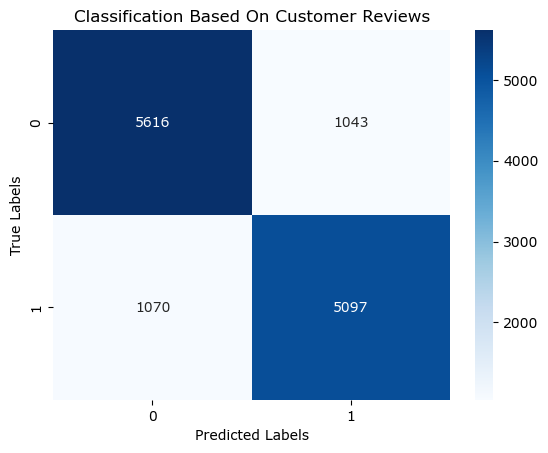

In [31]:
conf_matrix_rewies = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix_rewies, annot=True, fmt='d', cmap='Blues')
plt.title('Classification Based On Customer Reviews')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Now we enhance our model adding the 'overall' values to the predictors df and generate another confusion matrix:

In [32]:
# Combine text features with values from 'overall'
review_features_reduced = pd.DataFrame(get_reduced_features(df_cl['customer_review']))
review_features_reduced.columns = review_features_reduced.columns.astype(str)
features = pd.concat([df_cl['overall'], review_features_reduced], axis=1) 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    df_cl['recommended'], 
                                                    test_size=0.2, random_state=7)

svc = SVC(random_state=7)

scores = cross_val_score(svc, features, df_cl['recommended'], cv=5) 
avg_score = scores.mean()

svc.fit(features, df_cl['recommended'])
y_pred = svc.predict(X_test)

print(svc.__class__.__name__, avg_score)

SVC 0.9565558555675013


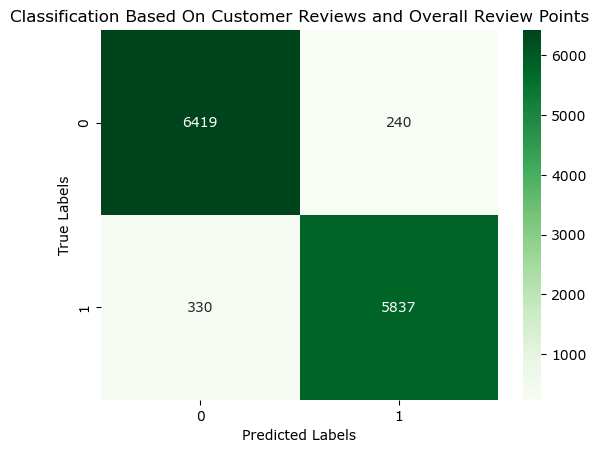

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    df_cl['recommended'], 
                                                    test_size=0.2, random_state=7)

conf_matrix_both = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix_both, annot=True, fmt='d', cmap='Greens')
plt.title('Classification Based On Customer Reviews and Overall Review Points')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# V. Conclusion

In this project, we delved into the comprehensive analysis of airline reviews, aiming to provide insights into predicting overall ratings and classifying recommendations. Our journey encompassed various stages, each contributing to a deeper understanding of the dataset and its implications.

To begin with, the data was cleaned in several ways. Firstly, all rows containing only null elements were removed. Some feature values were imputed using different techniques such as replacing with a constant and using machine learning model results. During imputation, special care was taken to preserve the original distribution of the data. During the regression analysis, we considered several types of models:
- first, simple models containing one parameter were built to estimate the R-squared. 
- then, several Polynomial regression models were built. 
- the final choice fell however on the model obtained by the Forward Stepwise Refinement algorithm, as it gave the best result. 

In the next part of the work, several classification models were built. The main goal here was to analyze the customer reviews provided in text form. Several classifiers with default settings were analyzed and it was found that SVC has the best average score value. That is why this classifier was used further when trying to improve the model. In doing so, information about the overall scores partially predicted by our multilinear model was taken into account. 

In the context of this project, all the objectives were accomplished. However, more could be considered in the following iterations, e.g.:
- using more columns from dataset for more extensive analysis, 
- using other imputation techniques, or 
- using more complex models for regression and classification.
